# 10. 검정

4.1절의 유로 동전문제를 다시 살펴보자.

```
가디언에 다음과 같은 통계기사가 게재되었다.

벨기에 1유로 동전을 축을 중심으로 250번 회전을 시켰는데, 앞면이 140회, 뒷면은 110회가 나왔다. 

런던 경제 대학 통계학 교수 배리 브라이트는 "매우 의심스럽다. 만약 동전이 한 쪽으로 기울어진 것이 아니라면, 결과가 이렇게 치우칠 확률은 7% 미만이다"라고 말했다.

하지만 이 데이터가 동전이 한 쪽으로 기울어졌다는 증거가 될까?
```

4장에서 이 문제를 풀었던 것을 복습해보자. 이를 풀 때 모델을 만들기 위한 다음 조건을 전제로 했다.

- 동전을 세워서 돌릴 때, 앞면을 보이며 넘어질 확률은 x다. 
- x의 값은 동전이 얼마나 균형 잡혀 있는지와 다른 여러 요인에 따라 다르다. 

x에 대한 균등사전분포로 시작해서, 140회의 앞면과 110회의 뒷면이라는 주어진 데이터에 따라 갱신을 했다. 

그 후 사후분포를 사용해서 가장 가능성 높은 x의 값인 사후평균과 신뢰구간을 구했다. 

하지만 실제로 맥케이의 "이 데이터가 동전이 한 쪽으로 기울었다는 것의 증거가 될까?" 라는 질문에 대답한 적은 없다.

드디어 이 장에서 대답하게 된다.


## 10.1 추정

4.2절의 이항분포에 나와있는 유로 동전 문제 해결 방안을 다시 살펴보자. 

1. 균등분포를 사전분포로 시작했다. 
2. 그리고 이항분포를 사용해서 x의 각 가능한 값에 대해 데이터의 확률을 구한다. 
3. 일반적인 방법으로 사후분포를 구한다. 

In [2]:
import numpy as np
from empiricaldist import Pmf

# 균등사전분포 설정
xs = np.linspace(0,1,101)
uniform = Pmf(1,xs)

# 이항분포를 사용한 likelihood 설정

from scipy.stats import binom

k, n = 140, 250
likelihood = binom.pmf(k,n, xs)  # nCk * p^{k} * (1-p)^{n-k}, xs = p의 집합

print(likelihood)

[0.00000000e+000 5.00530063e-208 2.28363390e-166 3.32219555e-142
 3.29452784e-125 3.84552776e-112 1.46149627e-101 1.06269517e-092
 4.25420045e-085 1.85380154e-078 1.40034421e-072 2.55526187e-067
 1.43888851e-062 3.01124348e-058 2.70591029e-054 1.17062248e-050
 2.67348530e-047 3.47534494e-044 2.73673810e-041 1.37535551e-038
 4.60953083e-036 1.06964599e-033 1.77476303e-031 2.16488870e-029
 1.98896780e-027 1.40572041e-025 7.78604032e-024 3.43558231e-022
 1.22534323e-020 3.57846544e-019 8.65603142e-018 1.75224924e-016
 2.99596078e-015 4.36253216e-014 5.45054660e-013 5.88239524e-012
 5.51703841e-011 4.52127134e-010 3.25347994e-009 2.06483616e-008
 1.16036625e-007 5.79455358e-007 2.57951887e-006 1.02654187e-005
 3.66114088e-005 1.17275295e-004 3.38040533e-004 8.78222438e-004
 2.05920600e-003 4.36243869e-003 8.35718172e-003 1.44861247e-002
 2.27280922e-002 3.22808438e-002 4.14998591e-002 4.82738355e-002
 5.07781596e-002 4.82579279e-002 4.13904173e-002 3.19937120e-002
 2.22501458e-002 1.389448

In [3]:
posterior = uniform * likelihood
posterior.normalize()

0.3984063745019918

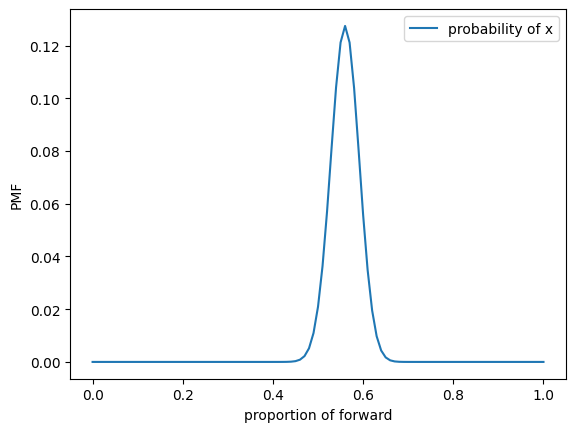

In [4]:
from utils import plt_default

posterior.plot(label = 'probability of x')
plt_default('proportion of forward')

알다시피, 사후평균은 약 0.56이고 90% 신뢰구간은 0.51에서 0.61이다. 

사전평균은 0.5였고, 사후평균은 0.65이므로 이 데이터가 코인이 기울었다는 증거가 된다.

하지만 사실 이 문제는 이렇게 단순하지 않다. 


## 10.2 증거

6.3절의 올리버의 혈액형에서 데이터가 가설 B보다 가설 A하에서 발생했을 가능성이 더 높을 때, 데이터는 가설 A에 부합하는 증거라고 했다. 이 조건은 다음과 같이 나타낼 수 있다.

$$P(D|A) > P(D|B)$$

게다가 이 가능도의 비율을 구함으로써 증거의 강도를 정량화할 수 있다. 이는 __베이즈계수(Bayes Factor)__ 라고 하고, 보통 $K$ 로 나타낸다.

$$ K = P(D|A)/P(D|B) $$

따라서 유로 동전 문제에 대해 fair와 biased 라는 두 가지 가설을 고려하여 각 가설 하의 데이터의 가능도를 계산한다. 

동전이 균일하면 앞면의 확률은 50%이고, 이항분포를 사용해서 데이터(250회 중 140개의 앞면)대로 나올 확률을 계산할 수 있다.

In [5]:
k = 140
n = 250

like_fair = binom.pmf(k, n, p = 0.5)
like_fair

0.008357181724918188

이 값은 이제 동전이 균일하다고 했을 때 이 데이터가 나올 확률이다. 

하지만 동전이 한 쪽으로 치우쳤을 경우에 이 데이터가 나올 확률은 얼마일까? 이는 치우치다는 말의 의미에 따라 달라진다. 

만약 치우치다의 의미가 앞면이 56%가 나올 확률이라고 알고 있었다면, 다음과 같이 또 이항분포를 사용할 수 있다. 

In [6]:
like_biased = binom.pmf(k, n, p = 0.56)
like_biased

0.05077815959518337

이제 가능도비를 구할 수 있다. 

- Note: 베이즈 규칙이 생각나지 않는가? Chapter 6 Odds and Addends 에서 다루었다. 

- 사후 오즈는 사전 오즈와 우도비의 곱이 된다. 베이즈 규칙은 종이나 머릿속으로 베이지안 갱신을 구할 때 편리하다.
- $P(H|D) = \frac{P(H) \times P(D|H)}{P(D)}$
- $odds(A|D) = odds(A) \times \frac{P(D|A)}{P(D|B)}$

In [7]:
K = like_biased / like_fair 
K

6.075990838368477

정의에 따르자면, 동전이 균일한 것보다 한 쪽으로 치우쳤을 가능성이 6배 가량 높다. 

하지만 가설을 정의하는 과정에서 데이터를 컨닝하듯이 사용했다. 제대로 하려면 데이터를 보기 전에 '치우치다'를 정의해야 한다. 


## 10.3 균등분포 형태의 치우침

'치우치다'를 앞면이 나올 확률이 50%가 아닌 것이라고 하고, 다른 모든 값이 나올 가능성은 동일하다고 하자.

균등분포를 만든 후 50% 영역을 삭제하면 이 정의 형태로 만들 수 있다.

In [8]:
biased_uniform = uniform.copy()
biased_uniform[0.5] = 0
biased_uniform.normalize()

100

이 가설 하에서의 데이터의 전체확률을 구하려면, x의 각 값에 대한 데이터의 조건부확률을 구해야 한다. 

그리고 여기에서 사전확률을 곱하고 각 결과값을 더한다.

In [9]:
# x의 각 값에 대한 조건부확률
xs = biased_uniform.qs
likelihood = binom.pmf(k, n, xs)
# 사전확률 * 조건부확률 
like_uniform = np.sum(biased_uniform * likelihood)
like_uniform

0.0039004919277707355

이 값은 '균등하게 치우친'가설 하에서의 데이터 확률이다. 

그럼 fair와 biased에서의 균등 가설 하에서의 데이터의 가능도 비율을 구해보자.

In [10]:
K = like_fair / like_uniform
K

2.142596851801358

이 데이터는 동전이 균일한 경우가 여기서 '치우치다'라고 정의한 경우보다 2 배 가량 가능도가 높다.

이 증거가 얼마나 강력한지에 대한 감을 얻으려면, 베이즈 규칙을 적용해 보는 방법이 있다. 

예를 들어, 만약 동전이 치우쳤을 사전확률이 50%이고, 사전 오즈가 1이라면 사후 공산은 1에서 2.1이 될 것이고, 사후확률은 약 68%가 된다. 

In [11]:
prior_odds = 1
posterior_odds = prior_odds * K
posterior_odds

2.142596851801358

In [12]:
def prob(o):
    return o/(o+1)

In [13]:
posterior_probability = prob(posterior_odds)
posterior_probability

0.6817918278551087

50% 에서 68%로 상황을 반전시키는 증거는 그다지 강력하지 않다. 

이번에는 치우치다가 x의 모든 값에 대해 동일한 가능성을 가지는 것을 의미하지는 않는다고 해보자. 

50% 근처의 값이 더 가능성이 높고 극단적인 값의 가능성은 좀 더 낮을 수 있다. 

삼각모양의 분포를 사용해서 이 다른 형태의 치우침에 대해 정의한 것을 나타내보자. 

In [14]:
ramp_up = np.arange(50)
ramp_down = np.arange(50,-1,-1)
a = np.append(ramp_up, ramp_down)
triangle = Pmf(a, xs, name = 'triangle')
triangle.normalize()

2500

균등분포에서 했던 것과 마찬가지로 x의 가능한 값 중 50% 값을 제외한다. (이 부분을 넘어간다고 해서 크게 차이가 나지는 않는다.)

In [15]:
biased_triangle = triangle.copy()
biased_triangle[0.5] = 0
biased_triangle.normalize()

0.98

다음은 균등분포와 비교하여 삼각분포는 어떻게 나타나는 지를 보여준다.

<Axes: >

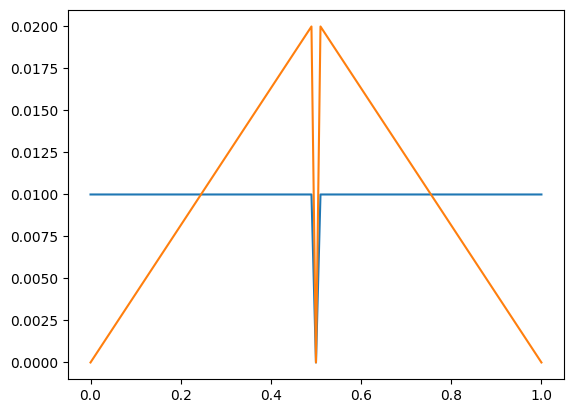

In [16]:
biased_uniform.plot()
biased_triangle.plot()

### 문제 10.1

여기에서의 치우치다는 정의 하(biased_triangle) 에서 데이터가 나올 총 확률을 구한 후 균일하다는 가설과 비교했을 때 베이즈계수를 구하자. 

이 데이터는 동전이 치우쳤다는 것의 증거가 되는가? 

## 10.4 베이지안 가설 검정

이 장에서는 통계적 가설 검정과 대비되는 베이지안 가설 검정을 살펴보자. 

통계적 가설 검정에서는 간단히 정의하기 어려운 p-값을 구해서 역시나 간단히 정의하기 어려운 통계적 유의성을 검증한다. 

베이지안 가설검정에서는 대신 하나의 가설이나 다른 가설에 대한 증거의 강도를 요약한 값인 베이즈 계수 K를 사용한다.

몇몇 사람들은 K는 사전확률에 의존하지 않으므로 사후확률을 사용하는 것보다 K를 살펴보는 것이 낫다고 말한다. 

하지만 예제에서 살펴본 것처럼 K는 종종 가설의 명확한 정의에 따라 달라질 수 있고, 가설에 대한 정의는 사전확률과 마찬가지로 논란의 여지가 있다. 

내 생각에는 베이지안 가설검정은 0과 1로 결정되는 것이 아니라 연속 형태로 증거의 강도를 측정하므로 이 쪽이 좀 더 유의할 것이다. 

하지만 이 역시 내가 생각하는 근본적인 문제, 즉 가설 테스트가 우리가 정말 관심 있는 것에 대해 질문하지 않는 것을 해결하지 못한다. 

왜 그런지 살펴보자. 동전을 돌리는 것을 실험하고 있고, 이 동전이 치우친 것이 맞는지 판단해야 한다고 하자. 

이 의문을 해결하기 위해 무엇을 할 수 있을까? 

내가 보기에 할 수 있는 것이 별로 없다. 반면에, 내가 생각하기에 보다 유용한, 그래서 더 의미가 있는 두 가지 질문이 있다.

- 예측: 우리가 동전에 대해 알고있는 것을 기반으로, 미래에 무슨 일이 일어날 것이다 예측할 수 있는가?
- 의사결정: 이 예측결과를 사용해서 더 나은 결정을 할 수 있을까? 

지금까지 몇 가지 예측에 대한 예제를 살펴보았다. 예를 들어, 8장에서는 득점율의 사후분포를 사용해서 축구 경기 결과를 예측했다. 

의사 결정에 대해서는 한 가지 사례를 살펴본 것이 있다. 9장에서 가격의 분포를 사용해 '그 가격이 적당해요' 문제의 최적 입찰가를 정했다. 

이제 베이지안 가설 검정의 또 다른 예제인 베이지안 밴딧 전략(Bayesian Bandit Strategy)을 살펴보며 이 장을 마무리하자. 


## 10.5 베이지안 밴딧

카지노에 가 본적이 있다면 원 암드 밴딧이라고 불리는 슬롯을 본 적 있을 것이다. 

슬롯머신에는 팔 같은 손잡이가 하나 달려 있고, 노상강도처럼 돈을 가져가기 때문에 이렇게 불린다. 

베이지안 밴딧 전략은 슬롯 머신을 단순화한 형태를 기반으로 문제를 푸는 전략이기 때문에 원 암드 밴딧의 이름을 따왔다. 

슬롯 머신을 계속 쓰고 있다고 가정하자. 여기서 이길 확률은 정해져 있다. 그리고 각각의 슬롯 머신마다 이길 확률이 다 다르지만, 그 확률이 얼마인지는 알 수 없다.

처음에는 각 슬롯 머신 각각에 대한 사전 믿음은 동일하기 때문에, 특정 슬롯 머신을 선호할 이유가 없다. 

하지만 각 슬롯 머신에서 게임을 몇 번씩 해보면, 이 결과로 확률을 추정할 수 있다. 

그리고 그 추정한 확률을 기반으로 다음에는 어떤 슬롯 머신을 고를지 정할 수 있다. 

이에 대한 상위 개념이 베이지안 밴딧 전략이다. 그럼 좀 더 자세히 살펴보자. 